In [1]:
library(jsonlite)
library(tidyverse)
# here library is not necessary as the data is big and in a different location

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
DATA_FOLDER <- "/mnt/f/big-data/vr_data/Data/preprocessing-pipeline/graphs"
DATA <- Sys.glob(file.path(DATA_FOLDER, "*_subgraphs_*.json"))

In [3]:
DATA

[1] "/mnt/f/big-data/vr_data/Data/preprocessing-pipeline/graphs/2002_subgraphs_WB.json"
 [2] "/mnt/f/big-data/vr_data/Data/preprocessing-pipeline/graphs/2005_subgraphs_WB.json"
 [3] "/mnt/f/big-data/vr_data/Data/preprocessing-pipeline/graphs/2006_subgraphs_WB.json"
 [4] "/mnt/f/big-data/vr_data/Data/preprocessing-pipeline/graphs/2007_subgraphs_WB.json"
 [5] "/mnt/f/big-data/vr_data/Data/preprocessing-pipeline/graphs/2008_subgraphs_WB.json"
 [6] "/mnt/f/big-data/vr_data/Data/preprocessing-pipeline/graphs/2009_subgraphs_WB.json"
 [7] "/mnt/f/big-data/vr_data/Data/preprocessing-pipeline/graphs/2013_subgraphs_WB.json"
 [8] "/mnt/f/big-data/vr_data/Data/preprocessing-pipeline/graphs/2014_subgraphs_WB.json"
 [9] "/mnt/f/big-data/vr_data/Data/preprocessing-pipeline/graphs/2015_subgraphs_WB.json"
[10] "/mnt/f/big-data/vr_data/Data/preprocessing-pipeline/graphs/2016_subgraphs_WB.json"
[11] "/mnt/f/big-data/vr_data/Data/preprocessing-pipeline/graphs/2017_subgraphs_WB.json"
[12] "/mnt/f/big-data/vr_data/Data/preprocessing-pipeline/graphs/2018_subgraphs_WB.json"
[13] "/mnt/f/big-data/vr_data/Data/preprocessing-pipeline/graphs/2020_subgraphs_WB.json"
[14] "/mnt/f/big-data/vr_data/Data/preprocessing-pipeline/graphs/2021_subgraphs_WB.json"
[15] "/mnt/f/big-data/vr_data/Data/preprocessing-pipeline/graphs/2024_subgraphs_WB.json"
[16] "/mnt/f/big-data/vr_data/Data/preprocessing-pipeline/graphs/2025_subgraphs_WB.json"

In [4]:
cur_data <- read_json(DATA[1])

In [5]:
pids <- c(2002, 2005, 2008, 2009, 2015, 2016, 2017, 2018, 2024, 2006, 2007, 2013, 2014, 2021, 2020, 2025)
groups <- c("Control","Control","Control","Control","Control","Control","Control","Control","Control", "Glaucoma","Glaucoma","Glaucoma","Glaucoma","Glaucoma","Glaucoma", "Glaucoma")

In [6]:
node_names <- map(cur_data$G$Nodes, function(x) x$Name) %>% unlist()
node_names <- c('PID', 'Group', node_names)

In [7]:
dummy_vals <- matrix(0, length(pids), length(node_names))
colnames(dummy_vals) <- node_names

In [8]:
i <- 1
for (data_file in DATA) {
    file_name <- basename(data_file)
    cur_p <- str_split(file_name, "_")[[1]][1] %>% as.integer()
    dummy_vals[i, "PID"] <- cur_p
    
    cur_g <- groups[which(pids == cur_p)]
    dummy_vals[i, "Group"] <- cur_g == "Control"

    # json data processing
    cur_data <- read_json(data_file)
    edges <- map(cur_data$G$Edges, function(x) x$EndNodes)
    for(edge in edges) {
        dummy_vals[i, edge[[1]]] <- dummy_vals[i, edge[[1]]] + 1
        dummy_vals[i, edge[[2]]] <- dummy_vals[i, edge[[2]]] + 1
    }
    i <- i + 1
}

In [9]:
g_table <- as_tibble(dummy_vals)
g_table <- g_table %>% mutate(across(c(PID, Group), factor))
g_table <- g_table %>% mutate(across(-c(PID, Group), as.integer))
g_table <- g_table %>% mutate(Group = fct_recode(Group, Control = "1", Glaucoma = "0"))

In [10]:
g_table

PID,Group,Building_100,Building_101,Building_102,Building_103,Building_104,Building_105,Building_106,Building_107,⋯,TaskBuilding_53,TaskBuilding_54,TaskBuilding_55,TaskBuilding_6,TaskBuilding_7,TaskBuilding_8,TaskBuilding_9,Windmill-TaskBuilding_10_1,crane_1,crane_2
<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
2002,Control,9,9,5,0,0,0,0,0,⋯,0,0,0,4,0,0,0,0,14,1
2005,Control,12,10,3,0,0,0,0,0,⋯,0,0,0,2,0,0,0,0,14,0
2006,Glaucoma,8,6,8,0,0,0,0,0,⋯,0,0,0,2,0,0,0,0,5,0
2007,Glaucoma,5,2,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,12,0
2008,Control,7,6,5,0,0,0,0,0,⋯,0,0,0,7,0,0,0,0,10,0
2009,Control,12,12,9,0,0,0,0,2,⋯,0,0,0,6,0,2,0,0,17,2
2013,Glaucoma,6,9,8,2,0,0,0,0,⋯,0,0,0,1,0,2,0,0,11,0
2014,Glaucoma,4,6,0,0,0,0,0,0,⋯,0,0,0,5,0,0,0,0,10,0
2015,Control,9,7,12,1,0,0,0,0,⋯,0,0,0,3,0,0,0,0,12,1


In [11]:
g_table_longer <- g_table %>% pivot_longer(!PID & !Group, names_to = "Building_Name", values_to = "Degree") %>% mutate(Building_Name = factor(Building_Name))

In [12]:
library(showtext)
font_add_google("Lato", "lato")
showtext_auto()

Loading required package: sysfonts

Loading required package: showtextdb



In [13]:
library(httpgd)
hgd()

httpgd server running at:
  http://127.0.0.1:43531/live?token=UhQIcMPG


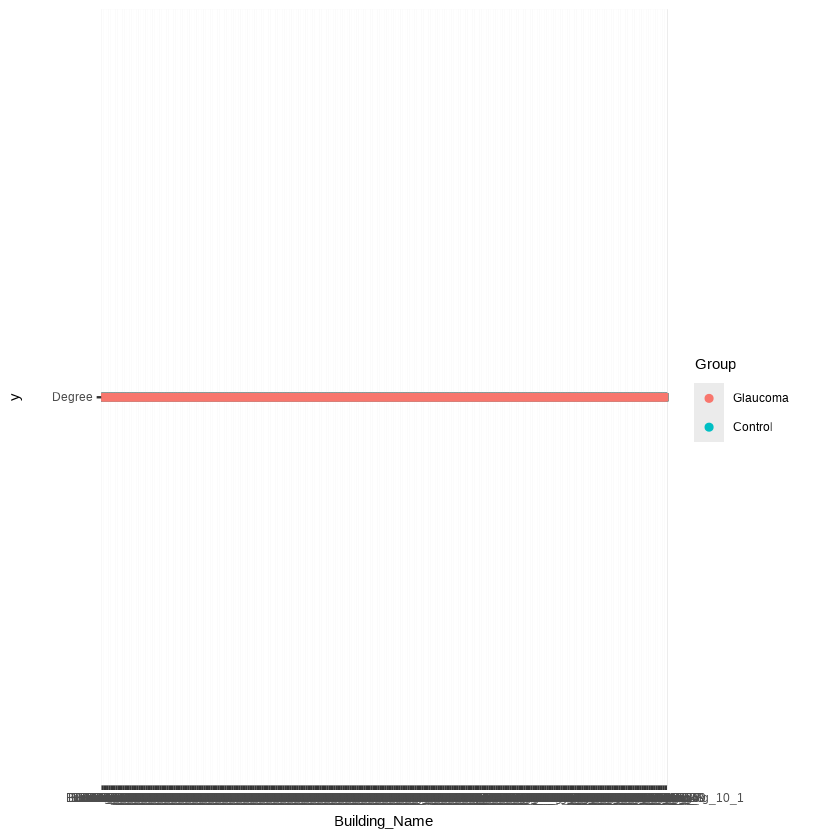

In [17]:
g_table_longer %>% ggplot(aes(x = Building_Name, y = "Degree", group = Group, color = Group)) + geom_point()

In [15]:
dev.list()

PNG unigd 
    2     3

In [16]:
dev.cur()

PNG 
  2